In [35]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report
# for balance labels
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import cv2
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [67]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

### 1. Get all the labels

In [40]:
mypath = '/Users/yinzi/Downloads/UTKFace'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [41]:
df.head()

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/UTKFace/9_1_2_201612192...
1,36,0,1,/Users/yinzi/Downloads/UTKFace/36_0_1_20170117...
2,86,1,0,/Users/yinzi/Downloads/UTKFace/86_1_0_20170120...
3,26,1,0,/Users/yinzi/Downloads/UTKFace/26_1_0_20170116...
4,1,1,2,/Users/yinzi/Downloads/UTKFace/1_1_2_201612191...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  object
 1   gender  23705 non-null  object
 2   race    23705 non-null  object
 3   file    23705 non-null  object
dtypes: object(4)
memory usage: 740.9+ KB


In [43]:
df.count()

age       23705
gender    23705
race      23705
file      23705
dtype: int64

In [44]:
df.describe()

,age,gender,race,file
count,23705,23705,23705,23705
unique,104,2,5,23705
top,26,0,0,/Users/yinzi/Downloads/UTKFace/9_1_2_201612192...
freq,2197,12391,10078,1


In [46]:
print(df['gender'].unique())
print(df['race'].unique())
print((df['age'].unique()))

['1' '0']
['2' '1' '0' '3' '4']
['9' '36' '86' '26' '1' '52' '25' '16' '27' '58' '6' '35' '2' '53' '23'
 '24' '75' '50' '15' '37' '10' '22' '29' '21' '46' '17' '63' '34' '61'
 '18' '20' '32' '30' '45' '31' '43' '3' '54' '60' '49' '59' '41' '82' '40'
 '5' '44' '76' '8' '28' '56' '39' '4' '96' '12' '67' '47' '48' '19' '62'
 '38' '71' '89' '90' '14' '68' '33' '80' '42' '65' '57' '7' '69' '55' '85'
 '78' '81' '13' '51' '66' '79' '64' '83' '11' '87' '77' '73' '70' '74'
 '92' '72' '88' '99' '84' '100' '93' '105' '95' '116' '103' '110' '91'
 '101' '111' '115']


In [47]:
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')

In [48]:
# put the age in different interval
df['age']=np.where(((df.age>=1) & (df.age<=2)), 1, df.age)
df['age']=np.where(((df.age>=3) & (df.age<6)), 2, df.age)
df['age']=np.where(((df.age>=6) & (df.age<9)), 3, df.age)
df['age']=np.where(((df.age>=9) & (df.age<12)), 4, df.age)
df['age']=np.where(((df.age>=12) & (df.age<21)), 5, df.age)
df['age']=np.where(((df.age>=21) & (df.age<36)), 6, df.age)
df['age']=np.where(((df.age>=36) & (df.age<51)), 7, df.age)
df['age']=np.where(((df.age>=51) & (df.age<80)), 8, df.age)
df['age']=np.where((df.age>=80), 9, df.age)

In [49]:
print(sorted(df['age'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [59]:
df['age'].count()

23705

### 2. show the image

In [50]:
df['file'][0]

'/Users/yinzi/Downloads/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg'

In [51]:
image1 = plt.imread(df['file'][0])
image1.shape

(200, 200, 3)

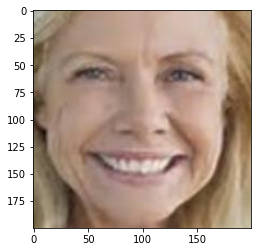

In [52]:
image2 = plt.imread(df['file'][50])
plt.imshow(image2)
plt.show()

### 3. balancing the age label

In [55]:
df['age'].value_counts()

6    10230
7     3992
8     3933
1     1605
5     1594
2      758
9      673
3      533
4      387
Name: age, dtype: int64

(array([ 1605.,   758.,   533.,   387.,     0.,  1594., 10230.,  3992.,
         3933.,   673.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

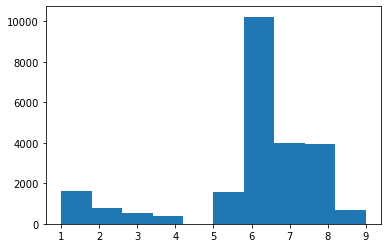

In [54]:
plt.hist(df['age'], bins=10)

In [62]:
df.count()

age       23705
gender    23705
race      23705
file      23705
dtype: int64

In [70]:
df.head(3)

,age,gender,race,file
0,4,1,2,/Users/yinzi/Downloads/UTKFace/9_1_2_201612192...
1,7,0,1,/Users/yinzi/Downloads/UTKFace/36_0_1_20170117...
2,9,1,0,/Users/yinzi/Downloads/UTKFace/86_1_0_20170120...


In [77]:
df1 = df.values

In [78]:
X = df1[:, 1:4] 
y1 = df1[:,0]

In [79]:
# test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.30, random_state=42)

In [80]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16593, 3), (16593,), (7112, 3), (7112,))

In [81]:
X3, y3 = X_train, y_train

In [82]:
y3 = LabelEncoder().fit_transform(y3)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
    per = v / len(y3) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=5, n=7200 (43.392%)
Class=7, n=2732 (16.465%)
Class=3, n=258 (1.555%)
Class=6, n=2818 (16.983%)
Class=4, n=1114 (6.714%)
Class=0, n=1093 (6.587%)
Class=1, n=536 (3.230%)
Class=8, n=473 (2.851%)
Class=2, n=369 (2.224%)


In [83]:
# transform the dataset
oversample = RandomOverSampler()
X3, y3 = oversample.fit_resample(X3, y3)
# summarize distribution
counter = Counter(y3)
for k,v in counter.items():
    per = v / len(y3) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=5, n=7200 (11.111%)
Class=7, n=7200 (11.111%)
Class=3, n=7200 (11.111%)
Class=6, n=7200 (11.111%)
Class=4, n=7200 (11.111%)
Class=0, n=7200 (11.111%)
Class=1, n=7200 (11.111%)
Class=8, n=7200 (11.111%)
Class=2, n=7200 (11.111%)


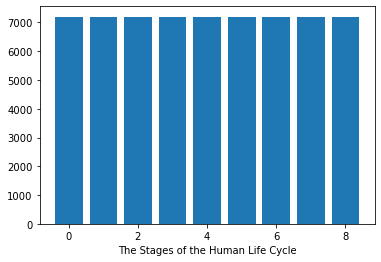

In [84]:
plt.bar(counter.keys(), counter.values())
plt.xlabel('The Stages of the Human Life Cycle')
plt.show()

In [85]:
X3.shape, y3.shape

((64800, 3), (64800,))

In [86]:
X3[0:2]

array([[1, 3,
        '/Users/yinzi/Downloads/UTKFace/24_1_3_20170119170547814.jpg.chip.jpg'],
       [0, 0,
        '/Users/yinzi/Downloads/UTKFace/54_0_0_20170119201455775.jpg.chip.jpg']],
      dtype=object)

### 4. sample 5000 images for testing model prediction accuracy

In [92]:
X4 = X3[:, 2]
X4[0]

'/Users/yinzi/Downloads/UTKFace/24_1_3_20170119170547814.jpg.chip.jpg'

In [93]:
X4.shape

(64800,)

In [95]:
dfbalanced = pd.DataFrame({'file1':X4, 'age1': y3})
dfbalanced.head()

,file1,age1
0,/Users/yinzi/Downloads/UTKFace/24_1_3_20170119...,5
1,/Users/yinzi/Downloads/UTKFace/54_0_0_20170119...,7
2,/Users/yinzi/Downloads/UTKFace/51_0_1_20170117...,7
3,/Users/yinzi/Downloads/UTKFace/10_0_4_20170103...,3
4,/Users/yinzi/Downloads/UTKFace/45_0_1_20170117...,6


In [96]:
dfbalanced['file1'].count()

64800

In [97]:
dfbalanced['age1'].value_counts()

5    7200
7    7200
3    7200
6    7200
4    7200
0    7200
1    7200
8    7200
2    7200
Name: age1, dtype: int64

In [99]:
n = int(5000/len(set(dfbalanced.loc[:,'age1'])))
dfbalancedsubset = dfbalanced.groupby('age1', group_keys=False).apply(lambda x: x.sample(n)).sample(frac=1)

In [100]:
dfbalancedsubset.count()

file1    4995
age1     4995
dtype: int64

In [101]:
dfbalancedsubset.head(2)

,file1,age1
54981,/Users/yinzi/Downloads/UTKFace/65_0_0_20170117...,7
20503,/Users/yinzi/Downloads/UTKFace/1_1_2_201612192...,0


In [124]:
dfbalancedsubset['age1'].value_counts()
y_balanced_train = dfbalancedsubset['age1']

### 5. Trian the Gradient Boosting model with balanced train dataset and test on the test dataset

In [103]:
images = []
for img_path in dfbalancedsubset['file1']:
    image = plt.imread(img_path)
    images.append(image)

In [108]:
len(images)

4995

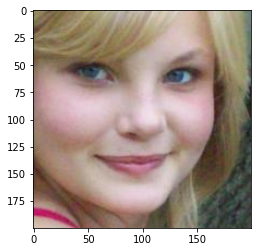

In [104]:
plt.imshow(images[3])

In [105]:
images[3].shape

(200, 200, 3)

In [106]:
gbc = GradientBoostingClassifier()

In [107]:
# gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

In [112]:
X_train = np.array(images)
X_train.shape

(4995, 200, 200, 3)

In [115]:
X_test1 = X_test[:,2]
X_test1[0]

'/Users/yinzi/Downloads/UTKFace/21_0_2_20170116170741864.jpg.chip.jpg'

In [117]:
len(X_test1)

7112

In [118]:
images_test = []
for img_path in X_test1:
    image = plt.imread(img_path)
    images_test.append(image)

In [120]:
len(images_test)

7112

In [122]:
X_test2 = np.array(images_test)
X_test2.shape

(7112, 200, 200, 3)

In [123]:
nimages, nX, ny, n = X_train.shape
X_train = X_train.reshape((nimages,nX*ny*n))
nimages, nX, ny, n = X_test2.shape
X_test2 = X_test2.reshape((nimages,nX*ny*n))

In [ ]:
gbc.fit(X_train,y_balanced_train)

In [ ]:
y_pred = gbc.predict(X_test2)

In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

### Below part are old editing --- fix it later as request

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, df['gender'])

In [23]:
len(X_train), len(X_test), len(y_train), len(y_test)

(7333, 2445, 7333, 2445)

In [24]:
pd.Series(X_train).shape

(7333,)

In [25]:
X_train[1].shape

(200, 200, 3)

* Each image is represented as a 200*200 pixel array, so there are 40000 features per image. Each image has three channel. we have 7333 images in the training dataset and 2445 images in the testing dataset. Each "feature" represents a pixel in the image, and each pixel can take any integer value from 0 to 255.

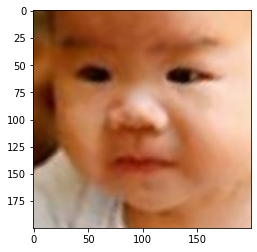

In [26]:
plt.imshow(X_train[1])

In [27]:
y_train.shape

(7333,)

In [28]:
y_train[0:5]

8598    1
2121    0
9051    1
5524    1
6107    1
Name: gender, dtype: int64

In [29]:
y_train.value_counts()

1    4034
0    3299
Name: gender, dtype: int64

In [30]:
y_test.value_counts()

1    1372
0    1073
Name: gender, dtype: int64

* The target variable is a label for Male and Female: 0, 1. There are 3299 male images in the training dataset and 4034 female images in the training dataset. And 1372 female images in the testing dataset. 1073 male images in the training dataset.

* scaling the features so that each feature takes on a value between 0 and 1

In [31]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

In [32]:
X_train.shape

(7333, 200, 200, 3)

In [33]:
nimages, nX, ny, nrgb = X_train.shape
X_train = X_train.reshape((nimages,nX*ny*nrgb))
nimages, nX, ny, nrgb = X_test.shape
X_test = X_test.reshape((nimages,nX*ny*nrgb))

In [34]:
X_train.shape, X_test.shape

((7333, 120000), (2445, 120000))

In [35]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [36]:
y_pred = gbc.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))

[[ 778  295]
 [ 268 1104]]


In [38]:
print("GBC accuracy is %2.2f" % accuracy_score(y_test, y_pred))

GBC accuracy is 0.77


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1073
           1       0.79      0.80      0.80      1372

    accuracy                           0.77      2445
   macro avg       0.77      0.76      0.77      2445
weighted avg       0.77      0.77      0.77      2445



In [41]:
y_pred[0:5]

array([1, 1, 1, 1, 1])

The accuracy is 0.77 for the basic Gradient Boosting model. We can try some feature selection and feature extraction, dimension reduction or hyperparameter tuning to improve the accuracy. 

### 4. race prediction

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(images, df['race'])

In [53]:
X2_train = np.array(X2_train)/255
X2_test = np.array(X2_test)/255

In [54]:
nimages, nX2, ny2, nrgb = X2_train.shape
X2_train = X2_train.reshape((nimages,nX2*ny2*nrgb))
nimages, nX2, ny, nrgb = X2_test.shape
X2_test = X2_test.reshape((nimages,nX2*ny2*nrgb))

In [60]:
gbc.fit(X2_train,y2_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [61]:
y2_pred = gbc.predict(X2_test)

In [62]:
print(confusion_matrix(y2_test, y2_pred))
print("GBC accuracy is %2.2f" % accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[1268    4   29   36   11]
 [  43   31    0   13    5]
 [ 110    1  239   15   10]
 [ 137    4   11  211   11]
 [ 162    1   12   41   40]]
GBC accuracy is 0.73
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1348
           1       0.76      0.34      0.47        92
           2       0.82      0.64      0.72       375
           3       0.67      0.56      0.61       374
           4       0.52      0.16      0.24       256

    accuracy                           0.73      2445
   macro avg       0.70      0.53      0.57      2445
weighted avg       0.72      0.73      0.70      2445



### 5. age prediction

In [63]:
df.head(3)

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...


In [66]:
df['age'].unique()

array([  9,   1,  16,  26,   2,  53,  36,  37,  10,  52,  18,  34,  30,
        75,  24,  86,   3,  54,  60,  59,  41,   5,  45,  35,   8,  56,
         4,  15,  96,  44,  23,  61,  12,  40,  25,  19,  38,  71,  49,
        89,  21,  22,  68,  27,  33,  80,  57,   7,  69,  55,  85,  39,
        32,  58,  17,  29,  90,  13,  48,  51,  46,  65,  20,  79,  31,
        83,  11,  50,  28,  87,  77,  63,  67,  14,  62,   6,  47,  42,
        76,  74,  92,  66,  73,  78,  64,  43,  70,  72,  82,  88,  84,
        81,  93,  95, 110, 101, 100,  99,  91])

In [68]:
len(df['age'].unique())

99

In [69]:
df['age'].max(), df['age'].min()

(110, 1)

* According to the "Stage of life": Infancy = 0-2 year, Toddler = 2-4 years, Child = 5-12 years, Teen = 13-19 years, Adult = 20-39 years, Middle Age Adult = 40-59 years, Senior Adult = 60+